Dans ce tp, on va s'interesser à un jeu de données sous forme de tableau, de type données bancaires : l'objectif est de prédire si l'utilisateur va faire defaut, ou pas, sur son prêt.

Je vous fournis, via la méthode train_and_eval, un modèle de machine learning qui va s'entrainer et prédire sur cette tâche.

Votre mission est d'extraire et transmettre les informations pertinentes des données, en les encodant par des méthodes adaptées, pour maximiser les performances du modèle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score
import seaborn as sbn
import random

random.seed(42)

def train_and_eval(data, labels):
    x_train, x_val, y_train, y_val = train_test_split(data,labels, random_state=42)
    clf = SVC()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_val)
    print("\tPrecision: %1.3f" % precision_score(y_val, y_pred))
    print("\tRecall: %1.3f" % recall_score(y_val, y_pred))
    return clf

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
g = df.groupby('y')
df = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)) # je ré-equilibre le jeu de donnée pour que l'on ait pas de soucis dans le reste du tp du au desequilibre
df.head()

age          job   marital          education  default housing loan  \
y                                                                           
no 0   34       admin.   married        high.school  unknown     yes   no   
   1   38       admin.  divorced  university.degree       no      no   no   
   2   49  blue-collar   married           basic.4y  unknown      no   no   
   3   31  blue-collar   married           basic.6y       no      no   no   
   4   32  blue-collar    single           basic.9y  unknown     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
y                                  ...                              
no 0   cellular   aug         fri  ...         1    999         0   
   1  telephone   jun         fri  ...         3    999         0   
   2  telephone   may         fri  ...         4    999         0   
   3  telephone   may         wed  ...         1    999         0   
   4   cellular   jul         fri  ...         1    999         0   

         poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
y                                                                          
no 0  nonexistent          1.4          93.444          -36.1      4.963   
   1  nonexistent          1.4          94.465          -41.8      4.959   
   2  nonexistent          1.1          93.994          -36.4      4.855   
   3  nonexistent          1.1          93.994          -36.4      4.857   
   4  nonexistent          1.4          93.918          -42.7      4.957   

      nr.employed   y  
y                      
no 0       5228.1  no  
   1       5228.1  no  
   2       5191.0  no  
   3       5191.0  no  
   4       5228.1  no  

[5 rows x 21 columns]

In [3]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000
mean,40.421121,386.042241,2.357543,887.279203,0.313254,-0.472672,93.484539,-40.133545,2.988398,5136.345151
std,12.029395,358.333080,2.427207,313.811466,0.699974,1.728004,0.633883,5.351214,1.893078,87.433775
min,17.000000,4.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,145.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.244000,5076.200000
50%,38.000000,265.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.021000,5191.000000
75%,48.000000,523.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,4199.000000,40.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Separons et encodons nos labels

In [4]:
y = df.y.values
y

array(['no', 'no', 'no', ..., 'yes', 'yes', 'yes'], dtype=object)

In [5]:
y.shape

(9280,)

Quel type de données est-ce ? Quel encoding choisir ? Remplacez la colonne y par une représentation plus adaptée

In [6]:
from sklearn.preprocessing import LabelEncoder

lbl_enc = LabelEncoder()
y = LabelEncoder().fit_transform(np.array(y))
n_sample = y.shape[0]
y

array([0, 0, 0, ..., 1, 1, 1])

N'oublions pas de supprimer la colonne label des données envoyées au modele

In [7]:
df = df.drop('y', axis=1)
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

# Encodons quelques colonnes

Les colonnes job et education

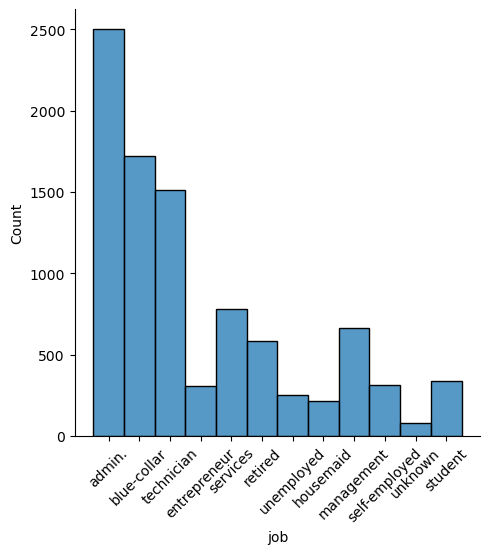

In [8]:
plot = sbn.displot(df['job'])
plot.set_xticklabels(rotation=45)

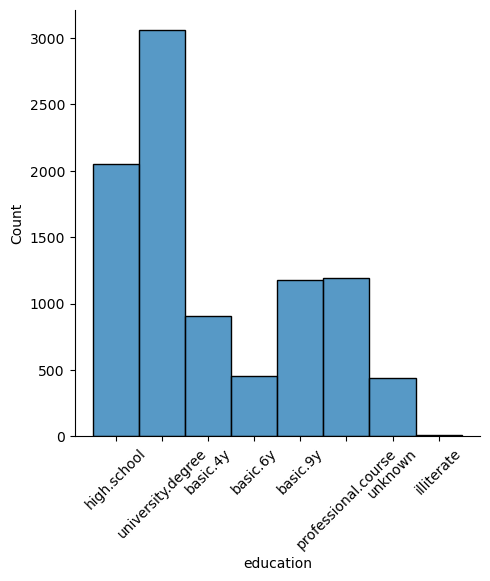

In [9]:
plot = sbn.displot(df['education'])
plot.set_xticklabels(rotation=45)

- Encodez ces deux colonnes et testez de predire y grâce à celles-ci:

In [10]:
from sklearn.preprocessing import OrdinalEncoder

jobs_and_education = df[['job','education']].values

enc = OrdinalEncoder()
jobs_ord = enc.fit_transform(jobs_and_education)

print('Vérifions l\'encoding du premier echantillon :', jobs_ord[0])

Vérifions l'encoding du premier echantillon : [0. 3.]


In [11]:
clf = train_and_eval(jobs_ord, y)

	Precision: 0.547
	Recall: 0.645


- Et avec un OneHotEncoding ?

In [12]:
jobs = df[['job','education']].values

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
jobs_onehot = enc.fit_transform(jobs)

Regardons le premier element

In [13]:
jobs[0]

array(['admin.', 'high.school'], dtype=object)

In [14]:
print(jobs_onehot[0])

  (0, 0)	1.0
  (0, 15)	1.0


- testons d'entrainer sur ces valeurs

In [15]:
clf = train_and_eval(jobs_onehot, y)

	Precision: 0.581
	Recall: 0.640


- On est meilleur avec l'ordinal pour le svm
- Et avec un randomforest ?

- Pour l'instant, on n'est pas très bon, tentons de rajouter des données. Par exemple rajoutons la colonne age

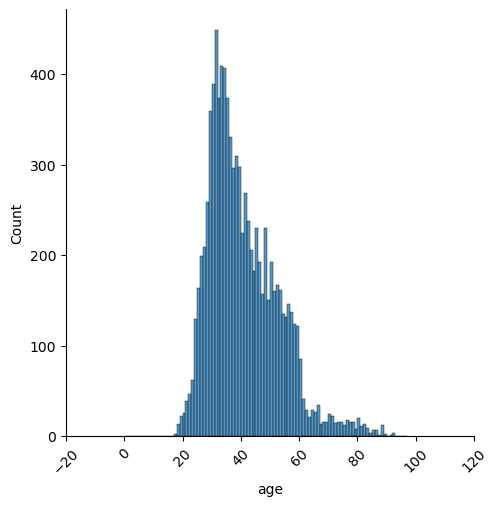

In [16]:
plot = sbn.displot(df['age'], bins=range(max(df.age)))
plot.set_xticklabels(rotation=45)

In [17]:
train_data = np.empty((n_sample, jobs_ord.shape[1] + 1))
train_data[:, :-1] = jobs_ord
train_data[:, -1] = df['age']


In [18]:
clf = train_and_eval(train_data, y)

	Precision: 0.630
	Recall: 0.448


On observe une chute du recall, mais notre colonne a peut être biaisé l'analyse comme elle a une plage de valeur différente

In [19]:
train_data[0]

array([ 0.,  3., 34.])

Il nous faut donc __normaliser__ nos données
 - on ne va peut pas utiliser un one hot, comme l'age est une grandeur ordonnée. Quelle méthode choisir ?
 - Un piège : __scikit normalizer ne fait pas ce que vous voulez__, il normalise les echantillons (les lignes) au lieu de normaliser les colonnes les unes par rapport aux autre. Il est adapté si on a par exemple des individus très différents des autres, mais pas lorsque ce sont les colonnes qui sont très différentes les unes des autres.

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data_norm = scaler.fit_transform(train_data)

In [21]:
train_data_norm[0]

array([0.        , 0.42857143, 0.20987654])

In [22]:
clf = train_and_eval(train_data_norm, y)

	Precision: 0.637
	Recall: 0.500


- L'interet de la normalisation est normalement évidente dans vos résultats, comparés aux précédents

- benchmarkons la standardisation, comme l'age ressemblait a une distribution normale

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data_std = scaler.fit_transform(train_data)

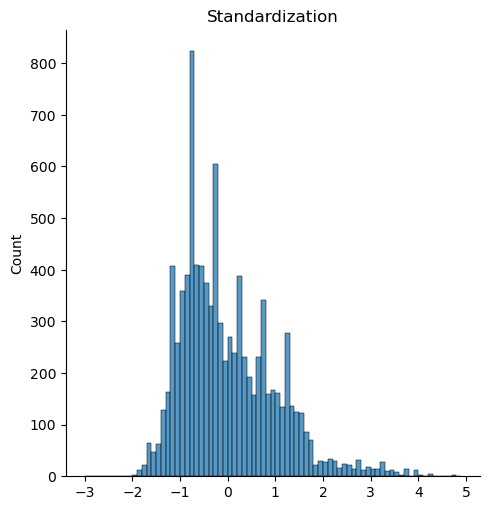

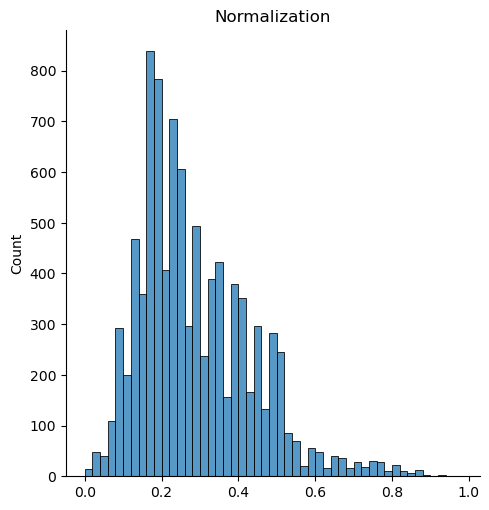

In [24]:
sbn.displot(train_data_std[:,-1],bins=np.arange(-3,5,0.1))
plt.title('Standardization')
sbn.displot(train_data_norm[:,-1],bins=np.arange(0,1,0.02))
_ = plt.title('Normalization')

In [25]:
clf = train_and_eval(train_data_std, y)

	Precision: 0.618
	Recall: 0.466


- la standardisation a-t-elle apportée ?
- on remarque que la distribution n'est pas bien répartie autour de 0, testons PowerTransform et QuantileTransform.

	Precision: 0.591
	Recall: 0.599


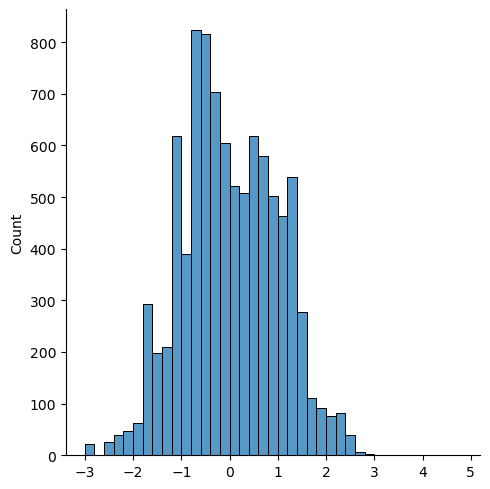

In [26]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()
train_data_pt = scaler.fit_transform(train_data)
sbn.displot(train_data_pt[:,-1],bins=np.arange(-3,5,0.2))
clf = train_and_eval(train_data_pt, y)

	Precision: 0.585
	Recall: 0.605


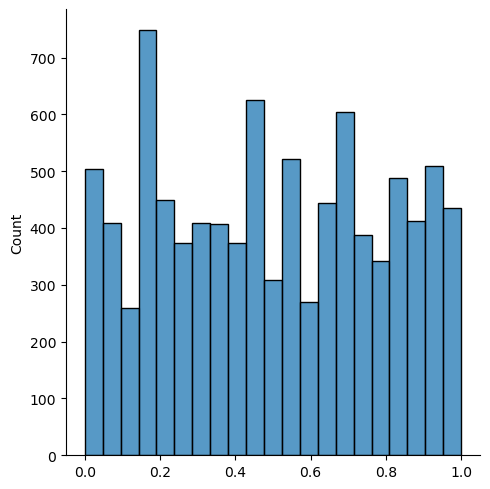

In [27]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer()
train_data_qt = scaler.fit_transform(train_data)
sbn.displot(train_data_qt[:,-1])
clf = train_and_eval(train_data_qt, y)

	Precision: 0.595
	Recall: 0.525


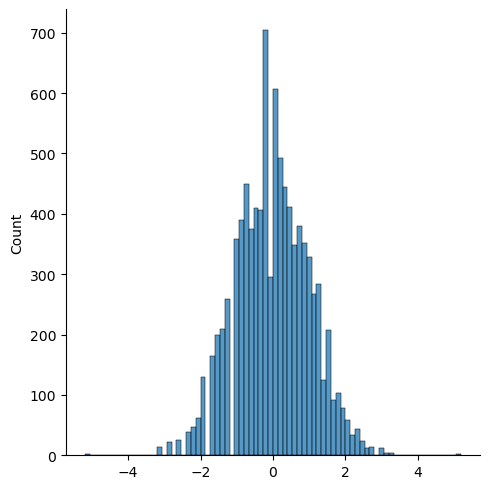

In [28]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(output_distribution='normal')
train_data_qt = scaler.fit_transform(train_data)
sbn.displot(train_data_qt[:,-1])
clf = train_and_eval(train_data_qt, y)

### Et si on avait eu du texte ?

In [29]:
mon_texte = 'une belle chaine de caractere comme notre jeu de donnée n\'en avait pas'

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

enc = CountVectorizer()
mon_texte_encode = enc.fit_transform([mon_texte]).todense()

In [31]:
mon_texte_encode

matrix([[1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]], dtype=int64)

- Et pour savoir quelle feature encode quel mot ?

In [32]:
enc.get_feature_names()

c:\Users\BEP29\anaconda3\envs\mathsDS\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['avait',
 'belle',
 'caractere',
 'chaine',
 'comme',
 'de',
 'donnée',
 'en',
 'jeu',
 'notre',
 'pas',
 'une']

- l'ordre n'est donc pas respecté